<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-обзор-данных" data-toc-modified-id="Загрузка-и-обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и обзор данных</a></span></li><li><span><a href="#Подготовка-эмбеддингов" data-toc-modified-id="Подготовка-эмбеддингов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка эмбеддингов</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Деление-на-выборки" data-toc-modified-id="Деление-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Деление на выборки</a></span><ul class="toc-item"><li><span><a href="#Признаки-и-целевой-признак" data-toc-modified-id="Признаки-и-целевой-признак-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Признаки и целевой признак</a></span></li><li><span><a href="#Обучающая,-валидационная-и-тестовая-выборки" data-toc-modified-id="Обучающая,-валидационная-и-тестовая-выборки-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Обучающая, валидационная и тестовая выборки</a></span></li></ul></li><li><span><a href="#Модели" data-toc-modified-id="Модели-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модели</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>LGBMClassifier</a></span></li><li><span><a href="#Сравнение-результатов" data-toc-modified-id="Сравнение-результатов-2.2.6"><span class="toc-item-num">2.2.6&nbsp;&nbsp;</span>Сравнение результатов</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Проект для «Викишоп» с BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75.

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели.
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

Импортируем библиотеки и модули, которые потребуются для выполнения проекта.

In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import transformers
from transformers import AutoTokenizer
from transformers import AutoModel
from tqdm import notebook
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

### Загрузка и обзор данных

Загрузим и изучим данные. Выведем на экран первые пять строк и информацию о датасете.

In [3]:
try:
    data = pd.read_csv('datasets/toxic_comments.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')

Выведем первые 5 строк и информацию о датасете.

In [4]:
data.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


В датасете 159292 строки, пропусков нет. Есть лишний столбец `'Unnamed: 0'`, который, по всей видимости, не несет никакой существенной информации (возможно, результат сброса индекса). Удалим этот столбец.

In [6]:
data.drop(columns=data.columns[0], axis=1 , inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [8]:
data.tail()

,text,toxic
159287,""":::::And for the second time of asking, when ...",0
159288,You should be ashamed of yourself \n\nThat is ...,0
159289,"Spitzer \n\nUmm, theres no actual article for ...",0
159290,And it looks like it was actually you who put ...,0
159291,"""\nAnd ... I really don't think you understand...",0


Лишний столбец удален.

Посмотрим на распределение значений целевого признака.

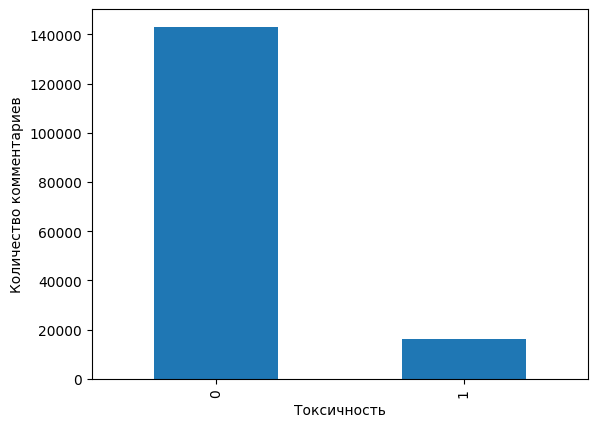

In [9]:
data['toxic'].value_counts().plot(kind='bar', xlabel='Токсичность',
                                  ylabel='Количество комментариев');

Определим долю токсичных комментариев.

In [10]:
data['toxic'].value_counts()[1] / data['toxic'].value_counts().sum()

0.10161213369158527

Можно наблюдать дисбаланс классов. Токсичные комментарии составляют всего около 10% от общего числа комментариев.

### Подготовка эмбеддингов

Возьмем из выборки 20000 случайных твитов

In [11]:
data = data.sample(20000).reset_index(drop=True)

Инициализируем токенизатор и токенизируем каждый текст.

In [12]:
tokenizer = AutoTokenizer.from_pretrained(f"unitary/toxic-bert")
tokenized = data['text'].apply( lambda x: tokenizer.encode (x, add_special_tokens=True, padding='max_length', truncation=True))

tokenizer_config.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/811 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Токенизатор сохраняет данные в виде списков, создадим из них массив с векторами одной длины, после этого создадим маску для выделения важных токенов.

In [13]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

attention_mask = np.where(padded != 0, 1, 0)

Инициализируем модель `AutoModel`. Передадим ей файл с предобученной моделью.

In [14]:
model = AutoModel.from_pretrained(f"unitary/toxic-bert")

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Преобразуем тексты в эмбеддинги. подключим библиотеку `tqdm` и применим функцию `notebook()`, чтобы наглядно показать индикатор прогресса.
Эмбеддинги создаются батчами. Зададим размер батча равным 100, и сделаем цикл по батчам.
Преобразуем данные в формат тензоров.
Чтобы получить эмбеддинги для батча, передадим модели данные и маску.
Из полученного тензора извлечём нужные элементы и добавим в список всех эмбеддингов.

In [15]:
batch_size = 100
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]).cuda() # закидываем тензор на GPU
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()

        with torch.no_grad():
            model.cuda()
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)

        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) # перевод обратно на процессор и преобразуем элементы методом numpy()
        del batch
        del attention_mask_batch
        del batch_embeddings

  0%|          | 0/200 [00:00<?, ?it/s]

**Выводы по шагу 1**
1. Данные загружены и изучены, удален лишний столбец.
2. Проанализировано соотношение значений в столбце `'toxic'`, обнаружен значительный дисбаланс классов.
3. Проведена токенизация и подготовка эмбеддингов для дальнейшего преобразования в матрицу признаков.

## Обучение

### Деление на выборки

#### Признаки и целевой признак

Разделим данные на признаки (создадим датафрейм из эмбеддингов) и целевой признак.

In [16]:
features = pd.DataFrame(np.concatenate(embeddings))
target = data['toxic']

#### Обучающая, валидационная и тестовая выборки

Разделим данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1. Сохраним одинаковое соотнонение классов в столбце 'toxic' во всех трех выборках при помощи параметра stratify.

In [17]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)

features_test, features_valid, target_test, target_valid = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=12345, stratify=target_valid_test)

Напишем функцию, которая покажет соотношение классов  в столбце `'toxic'` в выборках.

In [18]:
def target_ratio(sample, comment):
    sample.value_counts().plot(kind='bar', xlabel='Токсичность',
                                        ylabel='Количество комментариев',
                                        title=comment)
    plt.show()
    print(sample.value_counts()/sample.value_counts().sum())

Соотношение классов в обучающей выборке

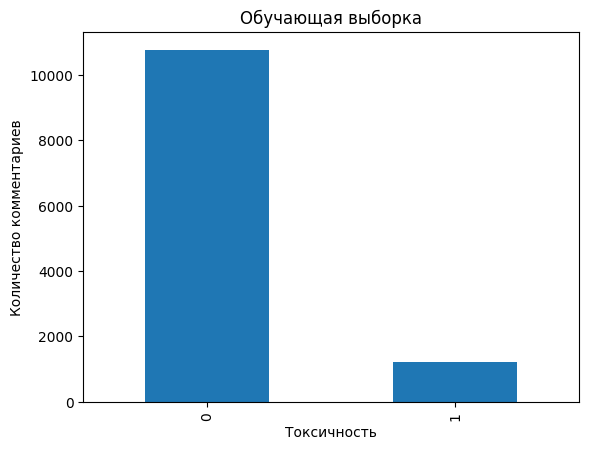

0    0.89775
1    0.10225
Name: toxic, dtype: float64


In [19]:
target_ratio(target_train, "Обучающая выборка")

Соотношение классов в валидационной выборке

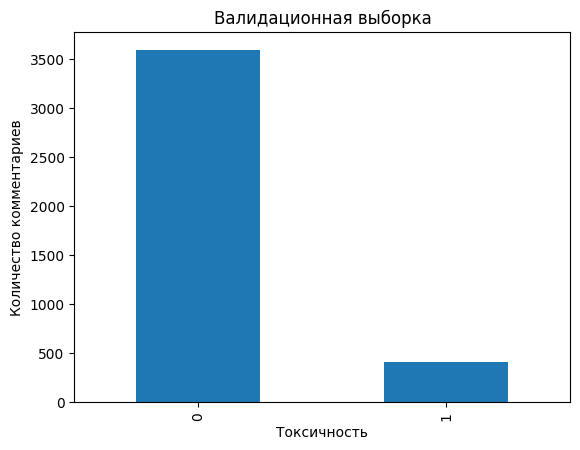

0    0.89775
1    0.10225
Name: toxic, dtype: float64


In [20]:
target_ratio(target_valid, "Валидационная выборка")

Соотношение классов в тестовой выборке

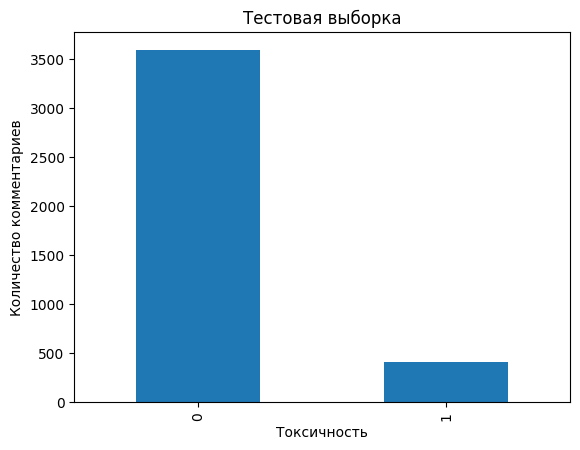

0    0.89775
1    0.10225
Name: toxic, dtype: float64


In [21]:
target_ratio(target_test, "Тестовая выборка")

Выведем размеры выборок.

In [22]:
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(12000,)
(4000,)
(4000,)
(12000, 768)
(4000, 768)
(4000, 768)


### Модели

Подберем значения гиперпараметров для разных моделей. Рассмотрим следующие модели:
* Дерево решений (DecisionTreeClassifier)
* Случайный лес (RandomForestClassifier)
* Логистическая регрессия (LogisticRegression)
* CatBoostClassifier
* LGBMClassifier


Учитывая дисбаланс, применим технику взвешивания классов. Для этого алгоритмах рассматриваемых моделей (дерева решений, случайного леса и логистической регрессии) в библиотеке `sklearn` есть аргумент `class_weight`. Укажем `class_weight='balanced'` (для `CatBoostClassifier` зададим `auto_class_weights='Balanced'`).

Создадим пустые списки, куда будем добавлять значения для будущей сравнительной таблицы.

In [23]:
best_f1 = []
best_model = []

#### Дерево решений

In [24]:
best_model_dt = None
best_result_dt = 0

for depth in range(1, 6):
    for samples_leaf in range(1, 6):
        model_dt = DecisionTreeClassifier(random_state=12345,
                                          max_depth=depth,
                                          min_samples_leaf=samples_leaf,
                                          class_weight = 'balanced')

        model_dt.fit(features_train, target_train)
        predictions_valid = model_dt.predict(features_valid)
        result_dt = f1_score(target_valid, predictions_valid)

        if result_dt > best_result_dt:
            best_model_dt = model_dt
            best_result_dt = result_dt
            best_depth = depth
            best_samples_leaf=samples_leaf


print("Значение F1 наилучшей модели на валидационной выборке:", best_result_dt)
print("max_depth:", best_depth)
print("min_samples_leaf:", best_samples_leaf)

Значение F1 наилучшей модели на валидационной выборке: 0.8959276018099548
max_depth: 4
min_samples_leaf: 1


In [25]:
best_f1.append(best_result_dt)
best_model.append(best_model_dt)

#### Случайный лес

In [26]:
best_model_rf = None
best_result_rf = 0
for est in [100, 200, 300]:
    for depth in [None] + [i for i in range(2, 5)]:
        model_rf = RandomForestClassifier(random_state=12345,
                                         n_estimators=est,
                                         max_depth=depth,
                                         class_weight = 'balanced')
        model_rf.fit(features_train, target_train)
        predictions_valid = model_rf.predict(features_valid)
        result_rf = f1_score(target_valid, predictions_valid)
        if result_rf > best_result_rf:
            best_model_rf = model_rf
            best_result_rf = result_rf
            best_est = est
            best_depth = depth


print("Значение F1  наилучшей модели на валидационной выборке:", best_result_rf)
print("max_depth:", best_depth)
print("n_estimators:", best_est)

Значение F1  наилучшей модели на валидационной выборке: 0.9414634146341463
max_depth: None
n_estimators: 200


In [27]:
best_f1.append(best_result_rf)
best_model.append(best_model_rf)

#### Логистическая регрессия

In [28]:
best_model_lr = None
best_result_lr = 0

for c in [0.01, 0.1, 1, 10]:
    for solv in ['liblinear', 'saga']:
        for penalty in ['l1', 'l2']:
            model_lr = LogisticRegression(random_state=12345,
                                         C=c,
                                         solver=solv,
                                         penalty=penalty,
                                         class_weight = 'balanced')
            model_lr.fit(features_train, target_train)
            predictions_valid = model_lr.predict(features_valid)
            result_lr = f1_score(target_valid, predictions_valid)
            if result_lr > best_result_lr:
                best_model_lr = model_lr
                best_result_lr = result_lr
                best_C=c
                best_solver=solv
                best_penalty=penalty


print("Значение F1  наилучшей модели на валидационной выборке:", best_result_lr)
print("Гиперпараметры лучшей модели: C=", best_C, 'solver=', best_solver, 'penalty=', best_penalty)

Значение F1  наилучшей модели на валидационной выборке: 0.9273356401384084
Гиперпараметры лучшей модели: C= 1 solver= liblinear penalty= l2


In [29]:
best_f1.append(best_result_lr)
best_model.append(best_model_lr)

#### CatBoostClassifier

In [30]:
best_model_cb = None
best_result_cb = 0

for rate in [0.1, 0.3, 0.5]:
    for depth in range(1,5):
        model_cb = CatBoostClassifier(random_state=12345,
                                      learning_rate=rate,
                                      depth=depth,
                                      auto_class_weights='Balanced',
                                      verbose=False)
        model_cb.fit(features_train, target_train)
        predictions_valid = model_cb.predict(features_valid)
        result_cb = f1_score(target_valid, predictions_valid)
        if result_cb > best_result_cb:
            best_model_cb = model_cb
            best_result_cb = result_cb
            best_rate=rate
            best_depth=depth


print("Значение F1  наилучшей модели на валидационной выборке:", best_result_cb)
print("Гиперпараметры лучшей модели: learning_rate=", best_rate, 'depth=', best_depth)

Значение F1  наилучшей модели на валидационной выборке: 0.9306698002350176
Гиперпараметры лучшей модели: learning_rate= 0.1 depth= 3


In [31]:
best_f1.append(best_result_cb)
best_model.append(best_model_cb)

#### LGBMClassifier

In [32]:
best_model_gbm = None
best_result_gbm = 0

for rate in [0.1, 0.3, 0.5]:
    for depth in range(1,5):
        for est in [100, 200, 300]:
            model_gbm = LGBMClassifier(random_state=12345,
                                       learning_rate=rate,
                                       max_depth=depth,
                                       n_estimators=est,
                                       class_weight='balanced',
                                       verbose=-1)
            model_gbm.fit(features_train, target_train)
            predictions_valid = model_gbm.predict(features_valid)
            result_gbm = f1_score(target_valid, predictions_valid)
            if result_gbm > best_result_gbm:
                best_model_gbm = model_gbm
                best_result_gbm = result_gbm
                best_rate=rate
                best_depth=depth
                best_est=est


print("Значение F1  наилучшей модели на валидационной выборке:", best_result_gbm)
print("Гиперпараметры лучшей модели: learning_rate=", best_rate, 'depth=', best_depth,
      'n_estimators=', best_est)

Значение F1  наилучшей модели на валидационной выборке: 0.9454545454545454
Гиперпараметры лучшей модели: learning_rate= 0.5 depth= 3 n_estimators= 300


In [33]:
best_f1.append(best_result_gbm)
best_model.append(best_model_gbm)

#### Сравнение результатов

Обобщим результаты в таблице

In [34]:
models_compared = pd.DataFrame(
    {
        'model':['DecisionTreeClassifier',
                  'RandomForestClassifier',
                  'LogisticRegression',
                  'CatBoostClassifier',
                  'LGBMClassifier'],
        'F1': best_f1
    }
)

models_compared

,model,F1
0,DecisionTreeClassifier,0.895928
1,RandomForestClassifier,0.941463
2,LogisticRegression,0.927336
3,CatBoostClassifier,0.930670
4,LGBMClassifier,0.945455


### Тестирование лучшей модели

Напишем цикл, который переберет значения f1 в сравнительной таблице и выберет лучшее значение метрики и модель, при обучении которой она получена.

In [35]:
best_result = 0
for i in range(len(best_f1)):
    if best_f1[i] > best_result:
        best_result = best_f1[i]
        model_best_f1 = best_model[i]

Проверим качество наилучшей модели на тестовой выборке.

In [36]:
predictions_test = model_best_f1.predict(features_test)
f1 = f1_score(target_test, predictions_test)
print("Значение F1 наилучшей модели на тестовой выборке:", f1)

Значение F1 наилучшей модели на тестовой выборке: 0.9271844660194174


Проверим модель на адекватность: сравним результаты с результатами константной модели.

In [37]:
model_dummy = DummyClassifier(strategy='constant', random_state=12345, constant=1)
model_dummy.fit(features_train, target_train)
predictions_dummy = model_dummy.predict(features_test)
f1_dummy = f1_score(target_test, predictions_dummy)
print("Значение F1 константной модели на тестовой выборке:", f1_dummy)

Значение F1 константной модели на тестовой выборке: 0.18552959854842369


**Вывод по шагу 2**
1. Были рассмотрены следующие модели классификации: `Дерево решений (DecisionTreeClassifier)`, `Случайный лес (RandomForestClassifier)`, `Логистическая регрессия (LogisticRegression)`, `CatBoostClassifier`, `LGBMClassifier`.
2. Все рассмотренные модели соответствуют заданному критерию (значение F1 не меньше 0.75), однако лучший результат на валидационной выборке показала модель `LGBMRegressor` c гиперпараметрами:  `learning_rate= 0.5, depth= 3, n_estimators= 300`.
3. Качество модели было проверено на тестовой выборке. Значение F1-меры также выше порогового значения 0.75 и близко к лучшему значению на кросс-валидации.

## Выводы

На основании имеющихся в рапоряжении данных о токсичности правок для интернет-магазина «Викишоп» была построена модель для определения токсичности комментариев. Этот инструмент позволит искать токсичные комментарии и отправлять их на модерацию. В ходе работы были выполнены следующие действия:

* данные загружены и подготовлены: при анализе обнаружен дисбаланс классов, проведена подготовка эмбеддингов для создания матрицы признаков;
* модели обучены:
    * подготовлены выборки для обучения моделей: данные разделены на выборки, эмбеддинги представлены как матрица признаков
    * обучены модели: `DecisionTreeClassifier`, `RandomForestClassifier`, `LogisticRegression`, `CatBoostClassifier`, `LGBMClassifier`, для каждой циклом подобраны гиперпараметры для определения лучшей модели; для борьбы с дисбалансом использована техника взвешивания классов;
    * все рассмотренные модели соответствуют заданному критерию (значение F1 не меньше 0.75), в качестве лучшей выбрана  модель с наибольшим значением F1 на валидационной выборке, проверено её качество на тестовой выборке.

**Общий вывод**:
Наилучший результат (метрика F1) показывает модель `LGBMRegressor` c гиперпараметрами:  `learning_rate= 0.5, depth= 3, n_estimators= 300`. Значение F1-меры на кросс-валидации и при проверке на тестовой выборке выше порогового значения 0.75.